## [NM2018] Numerical computing in Python tutorial

_Leo van Kampenhout — Institute for Marine and Atmospheric physics Utrecht (IMAU) — [email](mailto:L.vankampenhout@uu.nl) — [website](http://www.uu.nl/staff/LvanKampenhout/0)_ 

This tutorial starts with some background information on how numbers are internally represented on modern computers. Then we discuss Python language specifics and how to implement *logic* and *flow control*. The numerical library ***Numpy*** is then introduced and we finish by learning how to make plots using ***Matplotlib***.

A more complete overview of the capabilities of Python, Numpy and Matplotlib can be found online in the [Lectures on scientific computing with Python](http://jrjohansson.github.io/computing.html) by J.R. Johansson. It is suggested that you use these lectures as a reference.


The exercises are to be done individually, in class or at home. I recommend working in either the Spyder IDE or in a interactive Jupyter notebook, both of which come with the Anaconda Python distribution: https://www.continuum.io/downloads.

# Part 0 - calculator
Python can be used as a calculator by just entering arithmetic statements in an interactive session, like in a IPython console (Spider IDE) or a Jupyter notebook:

In [5]:
2**7

128

In [112]:
(5 + 2) / 2

3.5

The following operators are available: 

operation | symbol
--- | :---:
addition | `+`
subtraction | `-`
multiplication | `*`
division  | `/`
power | `**`
integer division | `//`
modulo | `%`


The scientific `e` notation is supported, where `2e13` means $2 \cdot 10^{13}$ and `3e-4` means $3 \cdot 10^{-4}$.

In [16]:
2e13 == 2*10**13

True

**Heads up.** In Jupyter, if you enter multiple statements at once, only the result of the last statement will be returned. There are a number of ways around that:

* wrap the statements in the `print()` built-in function, which displays the answer as text
* separate the statements by commas
* create a new cell for each statement

In [114]:
1+1
2+2

4

In [115]:
print(1+1)
print(2+2)

2
4


In [116]:
1+1, 2+2

(2, 4)

Inline comments can be added and must be preceded by the '#' sign.

In [2]:
print(1+1) # trivial calculation

2


# Part 1 - Data types

## Bits and bytes
Present-day computers are binary machines that operate on information that is base 2, which means that the information is expressed in just zeros and ones. The smallest entity of binary information is the *bit*. The bit consists of just a single binary digit and therefore can have only two states: 0 or 1. Eight bits taken together make up a *byte*, which is the second smallest entity of binary information. 


**Example.** Consider the byte 01101011 and let's assume it represents a number. Starting from the right, the first `1` encoutered corresponds to $2^0 = 1$, just like the last digit in a decimal number corresponds to $10^0 = 1$. The second rightmost digit (`1`) multiplies with $2^1 = 2$. The encoded numerical value of this byte is therefore:

$0 \cdot 2^7 + 1 \cdot 2^6 + 1 \cdot 2^5 + 0 \cdot 2^4 + 1 \cdot 2^3 + 0 \cdot 2^2 + 1 \cdot 2^1 + 1 \cdot 2^0 = 107$

**Exercise 1.1 (bytes)** 
1. What is the largest numerical value you can encode in a byte this way?
2. What is the total number of possible states for the byte? 
3. The Latin alphabet as used in The Netherlands has 26 characters ('states'). Considering both lower and upper case characters and 30 punctuation marks, is the byte large enough to encode the alphabet? 

## Floating point numbers
In scientific computing, we are not so much interested in characters but rather in decimal numbers (base 10 or ’real’ numbers) that we can relate to the physical world. For these kind of computations, a byte does not offer enough data states or *precision*, so larger data types are needed. Note that here ’data’ is synonymous to ’information’ and ’type’ to ’entity’ – this is the lingo that computer scientists use.

Typically, real numbers on a computer are made up of either 4 bytes (single precision) or 8 bytes (double precision), which correspond to 32 or 64 bits, respectively. Real numbers encoded in this binary form are referred to as _floating point numbers_ or simply _floats_. In standard Python, the `float` datatype is of double precision. 

In the Numpy library, which will be discussed in-depth later, different floating point data types are named after their bitsize: `float32` for single precision and `float64` for double precision.

In [330]:
import numpy as np
x=np.float32(1) # create variable of type float32
y=np.float64(1) # create variable of type float64
type(x), x.nbytes, type(y), y.nbytes

(numpy.float32, 4, numpy.float64, 8)

**Example.** Note that we can rewrite $110.1001$ as $1.101001 \cdot 2^2$

Now let us write any binary floating point number as
$$\pm 1.m \cdot 2^e$$
with ***mantissa*** m (’significant digits’) and exponent e. Note that this resembles the scientific notation of a decimal number, except that here the base is different (2 instead of 10). Of the 32 bits of a `float32` number, 1 bit is reserved for the sign, 23 bits for the mantissa, and the remaining 8 make up the exponent. Note that the effective precision of the mantissa is 24 bits because the leading binary ’1’ of the mantissa is implicit (Eqn. (1)). The `float` and `float64` have an effective mantissa of 53 bits and an exponent of 11 bits. The base number need not be stored since it is assumed the same on all modern computers.

![wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

**Exercise 1.2 (floats)**
Naturally, there are certain limitations to the precision of the mantissa and the range of the exponent. In this exercise we explore these limitations.

1. How many permutations or different states does a 24-bit mantissa have?

2. With one decimal digit one can produce 10 numbers (0-9). With two available digits this grows to 100. How many decimal numbers can one encode with a 24-bit mantissa?
3.  A double precision floating point number has an effective mantissa of 53 bits. How many decimal numbers can one encode with this?
4. Execute the following commands in interactive mode (IPython console):
```
 1.0 + 1e-15
 1.0 + 1e-16
```
which are by default performed in 64-bits (double precision). Explain the results using your answer at part (c).
5. In order to be useful, the 8-bit exponent must cover both negative (’small’) to positive (’big’) values. This means that 1 bit has to be reserved for the exponent sign, and we are effectively left with just 7 bits. What is the number of permutations or states one can make with 7 bits?
1. Verify that the largest decimal number one can make with a 7-digit binary exponent is around $10^{38}$. Take into account the base change. What is the largest decimal number one can make in double precision?

In [118]:
1.0 + 1e-15

1.000000000000001

In [119]:
1.0 + 1e-16

1.0

**Remark.** When the limits of the exponent are exceeded, a floating point number becomes infinite (’inf’) or not-a-number (’NaN’). Just be aware that this can happen, and remember that it usually indicates a programming error.

In [120]:
1.0e400 # 1 * 10^400

inf

## Integers
Just as the floating point numbers are the computer representation of $\mathbb{R}$, the set of whole-valued numbers $\mathbb{Z}$ is represented in the data type of integers. In numerical computing, integers are often just used in trivial ways, so we won’t go into their details here. It suffices to say that like floating points, there are 32-bit integers (Python: `np.int32`) and 64-bit integers (`int`, `np.int64`).


## Variables
A variable is not a data type, rather it the feature by which names can be used to store any data type -- even data types that you may have created yourself. Some examples:

In [121]:
x = 1.0
y = 10 
z = x*2 
do_work = True

Here we defined a floating point variable (`x`), an integer variable (`y`), another floating point variable (`z`) and finally a boolean (`do_work`) variable. We did not need to declare the type of the variable prior to defining it, as Python uses dynamical typing for that (it infers the data type from the assigned value). One can inspect the data type of a variable by calling the built-in function `type()`


In [122]:
type(y)

int

**Remark.** There are two simple rules about the naming of variables. First, they should always start with an alphabetic character. Second, words used by the Python language are reserved. These names can be found by calling

In [123]:
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


## Strings

A character string or simply _string_ is a data type encoding text, which is useful for labelling plots, writing diagnostic output, etc. In Python, a string is created whenever text is enclosed between ' or " quotes. Strings can be concatenated as follows:

In [124]:
'abc' + 'def'

'abcdef'

**Exercise 1.3 (strings)**
1. Define a new variable named s that has the value `’This is a string’`
2. Count the number of characters in s using the function `len()`
3. Evaluate `s.split()`. What does this function do?

## Lists and tuples

The list data type is particular to Python, and very useful. Lists are denotes by square brackets `[]` and can store any kind of other data, and also mixed data. 

In [125]:
x = [1, 'hello', 10.10]
type(x)

list

Many useful library functions exist that can take lists as input, or return a list as output. A tuple is the same as a list, except that it is immutable: the contents may not change after its definition. Tuples are denoted by round brackets `()`.

In [126]:
x = (1, 'hello', 10.10, 'there', 55)
type(x), len(x)

(tuple, 5)

Elements in lists, tuples can be selected by _indexing_ the variable. Indexing is denoted with square brackets `[]` right after the variable name (no space).  

In [127]:
x[1]

'hello'

Note that the indexing is zero-based, which means that the first element in the list or tuple has index 0, the second element index 1, etc. Indexing from the rear is also possible with negative indices (-1, -2, ...). 

In [128]:
x[-1]

55

Multiple elements can be selected by the `:` operator, which signals a range. The starting point is included but not the endpoint. This is comparable to the mathematical notation for domains `[a,b)`.

In [129]:
x[0:2]

(1, 'hello')

**Exercise 1.4 (Calculations with lists)** 
1. Define a new list named `yk` with values `1, -1, 8, 3, 2, 0.5, -1.5`.
2. Find the number of list elements using the `len()` built-in
3. Find the minimum and maximum using `min()`
and `max()` built-ins
4. The mean of sequence `yk` is given by
$$\overline{y} = \frac{1}{n}\sum_{k=1}^{n} y_k.$$ 
Calculate $\overline{y}$, making use of the `sum()` built-in.
5. Verify that the mean of the last four elements of $y$ is 1.0. Use negative indices.

## Booleans
The _boolean_ (named after George Boole, a 19th century British mathematician) is the logical data type. A boolean can have two states: it is either `True` or `False`. Therefore, it can be internally represented by just a single bit (see the section on bits and bytes). 

Booleans are indispensible when building logic into your code. For instance, consider the following piece of code:
```python
if (x<0): 
   y=0
else:
   y = x**2
```
which is the Python equivalent of
\begin{eqnarray*}
y(x) =
\begin{cases}
x^2 \qquad & \mathrm{if} \; x \geq 0 \\
0   \qquad & \mathrm{if} \; x \lt 0. \\
\end{cases}
\end{eqnarray*}

The if-statement takes a boolean value as input which it uses to decide which of the two different branches to enter. In this case the boolean is calculated by `x<0`. We could also have written `if (True)` but that is rather trivial and does not help in building logic.

As in the example above, booleans can be constructed from numerical values using **comparison operators** `<`, `>`, `<=`, `>=`, `==`. Further, booleans can be combined in various ways using the keywords `and`, `or`, `not`.

In [1]:
print(True and True) 
print(True and False)
print(True or False)
print(not True)

True
False
True
False


# Part 2 - flow control

## Indentation

Flow control is all about structuring your code in logical units. This has two goals, namely A) to make the code behave like it should, and B) in order to avoid code duplication. In other words, we generally always would like to write code that is as short as possible while still performing the task at hand, with little to no duplicate code. For instance, the evaluation of a mathematical function can be done in a Python function (keyword `def`, see below). 

These logical units of code are called ***code blocks*** and they can be recognized by their *indentation level*. One indentation level consists of a tab or four white spaces. 

```python
# base level 
def func(do_work):
    # indentation level 1
    if (do_work):
        #indentation level 2
        (...)
    else:
        #indentation level 2 again
        pass # empty code block is indicated by 'pass'
   
    # back to level 1   
    print('function func() has finished')   
```
**Remark.** Realize that indentation is critical to the execution of the code. Failing to indent correctly may lead to errors or, worse, the behaviour of the code is unknowingly incorrect.

## Conditionals

In Python, conditional branching is done using the `if`, `elif` ("else if") and `else` statements. Each of these statements must be followed by a code block. Not all branches have to be present at the same time though. 

```python
if (s[0] == 'A'):
    print('first character of s is an A')
elif (s[0] == 'B'):
    print('first character of s is an B')
elif (s[0] == 'C'):
    print('first character of s is an C')
else:
    print('first character of s is not any of A,B,C')
```

**Exercise 2.1 (conditionals)** Consider the same function as before
\begin{eqnarray*}
y(x) = 
\begin{cases}
x^2 \qquad & \mathrm{if} \; x \geq 0; \\
0   \qquad & \mathrm{if} \; x < 0
\end{cases}
\end{eqnarray*}
We write this into executable code by assigning some random value to `x`. The resulting `y` should to be printed to the screen. 

In [131]:
x = -1
if (x<0): 
    y=0
else:
    y = x**2
    print(y)

In this example the `print` is not executed when `x<0`. 
1. Repair the code above such that `y` is always printed.
2. Write code that implements this function:
\begin{eqnarray*}
y(x) = 
\begin{cases}
x^3 \qquad & \mathrm{if} \; x \geq 1; \\
x^2 \qquad & \mathrm{if} \; 0 \leq x < 1; \\
\sqrt(-x)   \qquad & \mathrm{if} \; x < 0
\end{cases}
\end{eqnarray*}
using boolean logic.

## Loops
Computers are extremely well suitable for automizing repetitive tasks. In case the repetitive task consists of applying a single operation (arithmetical or otherwise) to many elements (say numbers), a _loop_ can be used to automate the process. The process of automizing this is called _looping_ or _iterating_. One cycle of the loop is called an _iteration_.

There are two types of loops: `for`-loops and `while`-loops. A `for`-loop is used when the number of elements (and therefore iterations) is fixed and known at the start. This is the loop type that we will mostly use. The other loop type is the `while`-loop, that can be used to create a conditional loop, that only ends when a certain condition is met (say convergence of an algorithm). 

**Example.** Given a set of numbers, all of which need to be multipled by 2. You can store the numbers in a list and "loop over" the list, which means you take one number at the time until the list has no more elements. 

In [4]:
xlist = [4, 1, 3, 6, 0]
for x in xlist:
    print(x*2)

8
2
6
12
0


In other languages like Fortran or C, `for`-loops are typically performed over a certain monotonous range of numbers, rather than a list. This behaviour can be emulated by using the `range()` built-in, which yields a list with numbers based on start and end point, and optionally, a step size.

In [133]:
list(range(11))    # range(stop)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [134]:
list(range(2,11))  # range(start,stop)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [135]:
list(range(2,11,2)) # range(start,stop,step)

[2, 4, 6, 8, 10]

**Exercise 2.2 (strings & loops)** 
1. Create a string `s` that contains the following sentence: ”lists and tuples are useful for storing data”. 
2. Use the `s.split()` command to separate the individual words and put them in a list. Store this list as a variable called `s_split`.
3. Use the `len()` built-in to find the number of words.
2. Write a `for`-loop that iterates every word in the list, and prints it.

**Exercise 2.3 (list comprehensions)**
A Python _list comprehension_ is a quick and elegant way to create lists based on a formula. It uses a `for` loop to determine the number of elements. 

Let us define a list `fk` that is given by the quadratic polynomial
$$f_k = 5 + 2k - 2k^2$$
where $k \in [0,1,\ldots,12]$. The corresponding list comprehension is given below. 


In [136]:
fk_ = [5 + 2*k - 2*k**2 for k in range(0,13)]

1. Write your own `for`-loop that implements the polynomial. Start with an empty list `fk = []` and iteratively add elements to this list using `fk.append()`. In total you'll need 3 lines of code. Compare the result to the list comprehension `fk_`.
2. Write a `for`-loop to compute the sum of elements in fk. Check your answer with the `sum()` built-in.


**Exercise 2.4 (while-loop)** A typical `for`-loop has a fixed number of iterations that is known at the start of the loop. In contrast, the number of iteration in a `while`-loop is not known a priori. It uses a stopping criterion to determine when to break the loop.
1. The Fibonacci sequence is given by the equations:
\begin{eqnarray*}
\label{Fibonacci}
F_0 &=& 1 \\
F_1 &=& 1 \\
F_k &=& F_{k-2} + F_{k-1}
\end{eqnarray*}
Using `while`, write Python code that displays all Fibonacci numbers that are lower than 1000. _Hint:_ lists are useless here. Instead, use three scalar variables `fk`, `fkm1` ("$F_{k - 1}$"), and `fkm2` ("$F_{k-2}$").
2. Add code to verify that the sum of Fibonacci numbers lower than 1000 is 2583.

## Functions 
Functions are useful in organizing code and making code re-usable. For example, certain arithmetic calculations are applied at various stages in a program. These calculations may be separated out in a function, thus avoiding code duplication and makeing the code more readable.

In Python, a function is defined by the keyword `def`, followed by a function name, input arguments (if any), and a colon `:`. The following code, with one additional level of indentation, is the function body. The function may have a return value (see below) but this is not required.

In [137]:
def test_func(x):
    return x**2
test_func(10)

100

**Exercise 2.5 (functions)**
Recall the quadratic polynomial 
$$f_k = 5 + 2k - 2k^2.$$ 
Before, we evaluated this function only with integer values. We may rewrite it as
$$f(x) = 5+2x−2x^2$$
where now $x \in \mathbb{R}$. 
1. Write this as a function named `fx`. Verify that $f(3.5) = −12.5$.
2. Write another function `ffx` that implements $f^2(x) = f(f(x))$. Re-use the code that you wrote under (1). Verify that $f^2(1.0)) = -35$. 
3. Now write a third function `gx` that implements $g(x) = f(x) \cdot f^2(x) + 1$. Re-use `fx` and `ffx`. Verify that $g(-1) = 6.0$.
4. Finally, write a function `func_tuple` that given $x$, returns the tuple $(f(x), f^2(x), g(x))$. Re-use previous code. Report `func_tuple(5)`.
5. Re-define the function `fx` to
\begin{equation}
f(x) = 2 + 0.04 x^2.
\end{equation}
Verify that `func_tuple(5)` now yields `(3.0, 2.36, 8.08)`.


**Remark.** The previous exercise illustrates the power that functions have. Changing a single function definition (in this case, `fx`) triggered other functions (`ffx`, `gx`, `func_tuple`) to also behave differently. 

# Part 3 - Numpy and matplotlib
The [Numpy library](https://docs.scipy.org/doc/numpy/index.html) is great for linear algebra and doing numerical computations efficiently, so we’ll use it heavily during this course. 

The [Matplotlib library](http://matplotlib.org/) is the golden standard for scientific plotting in Python. It co-operates well with Numpy, meaning that you can directly plot Numpy vectors in Matplotlib. Find an example below of how seamlessly they integrate.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# required for inline displaying of figures in Jupyter
%matplotlib inline 

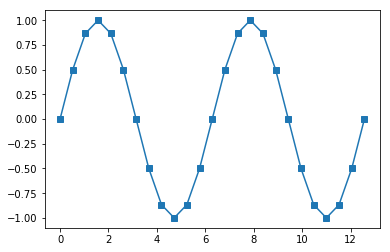

In [169]:
x=np.linspace(0,4*np.pi,25)
plt.plot(x,np.sin(x),'s-')

## Numpy cheatsheet

### Array creation
------

command|meaning
---|---
`np.asarray()`|from list
`np.diag()`|create matrix diagonal
`np.zeros()`, `np.ones()`|all 0 or 1
`np.eye()`|identity matrix
`np.linspace(begin, end, N)`|samples domain with `N` points
`np.arange(begin, end, step)`|creates monotonically increasing or decreasing array 
`np.random.rand()`| random values
`np.mgrid[0:5,0:5]`|mesh grid
`np.genfromtxt()`|from file (text)
`np.load()`|read previously stored Numpy array from file

### Other
-------

command|meaning
---|---
`np.pi`, `np.e`|$\pi$, $e$
`np.sqrt()`|square root (element wise)
`np.sin()`, `np.cos()`,`np.tan()`|trigoniometric functions (element wise)
`np.power(x,y)`| $x^y$
`np.log(x)`|$\ln(x)$
`np.sum()`|sum all elements in array 
`np.sum(axis=)`|sum all elements in array over specified dimension(s)
`np.min()`, `np.max()`, `np.mean()`|report min/max/mean over all elements
`np.dot(x,y)`|dot product
`np.transpose(x)`, `x.T`|$x^T$

More commands are found in the [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html).


## Array operations
The central datatype in Numpy is the `ndarray`. An `ndarray` can represent a both vectors and matrices (and higher order objects), depending on its dimensions or _shape_.

In [3]:
x = np.asarray([4,5,6]) # creates array from list
print(x)
print(x.shape)
type(x)

[4 5 6]
(3,)


numpy.ndarray

The great power of Numpy arrays is the capability of doing arithmetic directly on these arrays, not their elements, similar to MATLAB. Not only makes this easier-to-read code, the performance is also greatly improved. With lists, arithmetic is only allowed on the elements.

In [164]:
x + x

array([ 8, 10, 12])

**Exercise 3.1 (arrays)**
1. Implement a function that takes as input an array `x` and returns $f(x) = x^2 + \sin(8x)$. 
2. Test the function on the 100 `x` values sampled between $[-\pi, \pi]$. 
3. Make a lineplot of `f(x)`

***Answers.***

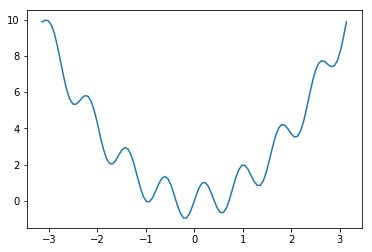

In [6]:
def fx(x):
    return x**2 + np.sin(8*x)

x = np.linspace(-np.pi,np.pi,100)
plt.plot(x,fx(x))

## Dimensions & `np.newaxis`

In [190]:
x = np.zeros(10) # vector
x.shape

(10,)

In [152]:
M = np.eye(10) # identity matrix
M.shape # matrix 

(10, 10)

In the first example, `x` has only a single dimension, despite the trailing comma. When transposing the vector this is an issue, because the transposed vector will also have just a single dimension. In other words, one-dimensional ndarrays (having only ’rows’) are not readily transformed into something two-dimensional (having ’columns’ and ’rows’), although that would be desired from a mathematical point of view.

In order to perform an actual transpose, x needs either two dimensions to start with

In [208]:
x = np.zeros((10,1))
y = x.T # transpose
x.shape, y.shape

((10, 1), (1, 10))

or we need to "add" the missing dimension with `np.newaxis` before performing the transpose

In [204]:
x = np.zeros(10)
y = x[:,np.newaxis].T
y.shape

(1, 10)

**Remark.** "Axis" is Numpy-speak for "dimension".

**Exercise 3.2 (vectors)** 
1. Perform `len()` on the arrays `x` and `y` defined by 
```python
x = np.zeros((10,1))
y = x.T 
```
What is the interpretation of `len()` here?
2. Consider the code
```python
for r in vec: 
      print(r)
```
What is the interpretation of `r`? Verify your answer using first `vec = x` and then `vec = y`.

***Answers.***

1.

In [7]:
x=np.zeros((10,1))
y=x.T
len(x),len(y)

(10, 1)

The function `len` gives you the number of rows in the vector.

2. "r" stands for row. So x will give 10 rows , y has 1 row.

In [10]:
vec = y
for r in vec:
    print(r)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Selection & indexing

Similar to lists, selection of single elements in an array is done through the bracket notation `[]`

In [254]:
x = np.arange(5)
x[2]

2

When the variable is a matrix, a single element is selected by specifying both row and column:

In [260]:
M = np.random.rand(3,3)
M[0,1] # row 0, column 1

0.64207677532852081

The entire row is selected when just a single dimension is specified:

In [263]:
M[0] # first row

array([ 0.5437085 ,  0.64207678,  0.74504719])

The colon `:` stands for _all_. So to select a single column, we specify _all rows_ of that column:

In [264]:
M[:,0] # first column

array([ 0.5437085 ,  0.81663738,  0.93362806])

Numpy operations can readily be performed on such sub-matrices, which are called **slices**. 

In [266]:
np.mean(M[:,0]) # mean value of first column

0.76465797798229918

**Exercise 3.3 (statistics)** Two-dimensional Numpy arrays do not always represent matrices, they may also be used to store data. Results from a computer simulation for example, or field measurements. 

Japanese researchers take great interest in radioactive decay. The radioactivity of three different samples $(s_1, s_2, s_3)$ was tested at four different times. This yielded the following table:

Activity [-] | t = 0 | t = 1 | t = 2 | t = 3
---|---|---|---|---
$s_1$|8.5|4.3|2.5|2.8
$s_2$|10.1|5.9|2.3|1.1
$s_3$|5.0|-1.0|4.6|4.4

1. Define this table manually as $A_0$: `A0 = np.asarray([[8.5,4.3,3.5,2.8], [..], [..]])`

2. The value -1.0 in $A_0$ represents a measurement failure. Repair this element by substituting $s_3$’s mean activity at t = 0 and t = 2. Use array indices `[]` to do this.

3. The measuring device was found to have a consistent bias of 0.1. Subtract the bias from all values in $A_0$ and store the result as $A_1$.

4. Determine the average activity at t = 0, using array slicing and np.mean().

5. Determine the average activity for all times, using the axis argument of function `np.mean()`. Recall that ’axis’ means dimension in Numpy.

6. The standard deviation is calculated using `np.std()`. At what time is the spread across samples smallest?

7. Determine the sample means. Subtract the sample means from the sample measurements, and store the result as $A_2$. 

8. Visualise the results using 
```python
plt.imshow(A2)
plt.colorbar()
```

***Answers.***

In [14]:
# 1
A0 = np.asarray([[8.5,4.3,2.5,2.8], [10.1,5.9,2.3,1.1], [5.0,-1.0,4.6,4.4]])
A0

array([[  8.5,   4.3,   2.5,   2.8],
       [ 10.1,   5.9,   2.3,   1.1],
       [  5. ,  -1. ,   4.6,   4.4]])

In [16]:
# 2 
A0[2,1] = (A0[2,0]+A0[2,2]) / 2
A0

array([[  8.5,   4.3,   2.5,   2.8],
       [ 10.1,   5.9,   2.3,   1.1],
       [  5. ,   4.8,   4.6,   4.4]])

In [17]:
# 3
A1 = A0 - 0.1

In [19]:
# 4
np.mean(A1[:,0]) # time t=0 corresponds to column 0

7.7666666666666657

In [22]:
# 5
np.mean(A1, axis=0)

array([ 7.76666667,  4.9       ,  3.03333333,  2.66666667])

In [24]:
# 6 
np.std(A1, axis=0) # the spread is smallest at t=1

array([ 2.12968438,  0.66833126,  1.0402991 ,  1.34742553])

In [29]:
# 7 
sample_mean = np.mean(A1,axis=1)
A2 = A1 - sample_mean[:,np.newaxis]
A2

array([[ 3.975, -0.225, -2.025, -1.725],
       [ 5.25 ,  1.05 , -2.55 , -3.75 ],
       [ 0.3  ,  0.1  , -0.1  , -0.3  ]])

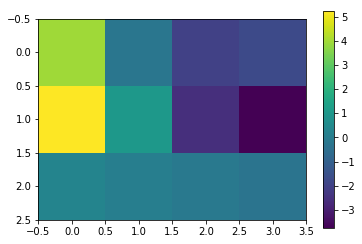

In [30]:
# 8 
plt.imshow(A2)
plt.colorbar()

## Multiplications

In Numpy, there are two different product operators:
$$x * y$$
$$x \cdot y$$
that are represented by `*` and `np.dot`, respectively. In the first, element-wise multiplication, each element of x is multiplied by each corresponding element of y. The second is the mathematical dot product.

**Exercise 3.4 (multiplication)**
1. Define `I` as the 10 x 10 identity matrix (see cheatsheet above), and `x = np.arange(10)[:,np.newaxis]`.
2. Report `I.shape` and `x.shape`.
3. Even though the number of elements is not the same, `I*x` will succeed. Explain what happens.
4. Report `np.dot(I,x)` and `np.dot(x,I)`. Explain the message using your knowledge of linear algebra.

***Answers.***

In [32]:
# 1 
I = np.eye(10)
x = np.arange(10)[:,np.newaxis]

In [33]:
# 2
print(I.shape)
print(x.shape)

(10, 10)
(10, 1)


In [35]:
# 3
I*x

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]])

Explanaition: every row of the identity matrix is multiplied by every row in `x`.

In [36]:
# 4.
np.dot(I,x)

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.]])

In [37]:
np.dot(x,I)

ValueError: shapes (10,1) and (10,10) not aligned: 1 (dim 1) != 10 (dim 0)

When doing matrix multiplication the inner dimensions must agree.

## Broadcasting

In the previous exercise, we could element-wise multiply (`*`) matrix $I$ and vector $x$ even when they did not have the same size. This is enabled through a feature of Numpy called **broadcasting**. It simply means when one array is smaller than another, Numpy will try to "duplicate" the smaller array in order to match the larger. In the case of $I$ and $x$, $I$ had 10 columns whereas $x$ had just one. But this array
$$[x \; x \;x \;x \;x \;x \;x \;x \;x \;x]$$
also has 10 columns and can be multiplied (element-wise) by $I$. 

Broadcasting happens automatically and without warning. It is mostly a blessing (for example: when multiplying a matrix by a scalar) but it can also be a curse and make for nasty bugs. One general recommendation is to inspect dimensions sizes regularly (`.shape`) to make sure you are computing the right thing.

**Remark.** Broadcasting is not used in `np.dot` because it would lead to ambiguities. 

## Soft vs. hard copies

Consider the following code.

In [239]:
x = np.arange(5)
y = x
y[-1] = -1
x

array([ 0,  1,  2,  3, -1])

Observe that by changing the last element in `y` we also changed the last element in `x`. This is because `y` is a so-called **soft copy** of `x`, also known as a *pointer* or a *reference*. We say that `x` and `y` are *aliased*, which means that they are corresponding to exactly the same piece of random-access memory (RAM).

![aliased](https://raw.githubusercontent.com/lvankampenhout/NM2018-python/master/aliased.png)

Now, by changing one, we are also changing the other. Unfortunately, soft copying is the default behaviour in Numpy when doing a direct assignment (`=`) and it is good to be aware of this. The advantage of soft copying is that it is much faster than the alternative: **hard copying**, which requires that the contents of the array are copied.

In [238]:
x = np.arange(4)
y = x.copy()
y[-1] = -1
x

array([0, 1, 2, 3])

**Exercise 3.5 (soft copies)**
Consider the following function that computes $x^2$ and erases the last element in the array.

In [38]:
def squareXAndZeroLastElement(x, do_square=True):
    # Returns x**2 with last element zeroed out.
    if (do_square):
        y = x**2
    else:
        y = x
    y[-1] = 0
    return y

1. Define a vector `x` running from 0 to 5.
2. Execute the function with `squareXAndZeroLastElement(x)` and print the result. Verify that `x` is unchanged.
3. The function has a second Boolean parameter `do_square` that is optional. When this parameter is set to `False` observe that the squaring is disabled. Execute `squareXAndZeroLastElement(x, do_square=False)` and print the result. What happened to your original `x`?
4. Repair the function such that it never changes the input argument `x`.

***Answers.***

In [43]:
# 1.
x = np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

In [44]:
# 2. 
print(squareXAndZeroLastElement(x))
print(x)

[ 0  1  4  9 16  0]
[0 1 2 3 4 5]


In [45]:
# 3. 
print(squareXAndZeroLastElement(x,do_square=False))
print(x)

[0 1 2 3 4 0]
[0 1 2 3 4 0]


The last element of `x` is now also erased.

In [46]:
# 4. 
def squareXAndZeroLastElement(x, do_square=True):
    # Returns x**2 with last element zeroed out.
    if (do_square):
        y = x**2
    else:
        y = x.copy()
    y[-1] = 0
    return y

x = np.arange(6)
print(squareXAndZeroLastElement(x,do_square=False))
print(x)

[0 1 2 3 4 0]
[0 1 2 3 4 5]


## Mask arrays
In the context of Numpy, a **mask** is defined as a boolean matrix that has the same size as your data array. Masks are useful for selecting elements in an array or matrix. 

**Example.** In climate science, output is usually generated on a latitude-longitude grid with dimensions $N \times M$. Some points of the grid will part of the land, and some part of the ocean. We can use a land-mask (`mask_land`) to distinguish between the two. Given a field named `precip` that represents precipitation we'd have

expression|selection
---|---
`precip[:,:]`| all points
`precip[mask_land]`| only land points
`precip[~mask_land]`| only ocean points

A mask can be created by one of the comparison operators `<`, `>`, `>=`, `<=` , `==`, `!=`. For instance, to select all points that have precipitation $> 100$ mm, we could say `mask_100mm = precip > 100`. 

Arrays may be indexed by masks. 

**Exercise 3.6 (masking)**
1. Create a 5 × 5 matrix `M` filled with random elements, drawn from a uniform distribution over the interval $[−1, 1)$. Use `np.random.rand()`, which draws from the interval $[0, 1)$.
2. Create a mask `mymask`, that is equal `True` where $−0.2 < M_{i,j} \leq 0.2$, and `False` elsewhere.
3. Count the number of $M_{i,j}$ where $−0.2 < M_{i,j} \leq 0.2$ using `np.sum()`. Check by hand.
4. Create a new matrix `P = np.zeros(M.shape)`. Now set $P_{i,j} = M_{i,j}$ where $M_{i,j} > 0$ using a mask.
5. Create a function `blankSubzeroValues()`, that takes a matrix as an input. The function then sets any values that < 0 to zero and returns the result. Test by comparing `Q = blankSubzeroValues(M)` to `P`.
6. Extend this function as follows. Use `print()` to report the message:
     `X values have been blanked`
where `X` is of course the actual number of entries that have been set to zero. Only report this message if 2 or more values have been blanked.

***Answers.***

In [79]:
# 1.
M = np.random.rand(5,5) * 2 - 1

In [80]:
# 2. 
mymask = (M <= 0.2) * (M > -0.2)
mymask

array([[False, False, False, False, False],
       [ True, False, False, False,  True],
       [False,  True, False,  True, False],
       [False, False, False, False,  True],
       [False, False, False, False, False]], dtype=bool)

In [81]:
# 3.
np.sum(mymask)

5

In [159]:
# 4. 
P = np.zeros(M.shape)
P[M>0] = M[M>0]

In [90]:
# 5. 
def blankSubzeroValues(mat):
    # set all values < 0 in input matrix to zero
    mat2 = mat.copy() # prevent overwriting of input matrix
    mat2[mat<0] = 0
    return mat2

Q = blankSubzeroValues(M)

In [89]:
np.all(Q == P) # test whether all elements are equal

True

In [91]:
# 6. 
def blankSubzeroValues(mat):
    # set all values < 0 in input matrix to zero
    mat2 = mat.copy() # prevent overwriting of input matrix
    mat2[mat<0] = 0
    nblank = np.sum(mat<0)
    if (nblank > 2):
        print(nblank, 'values have been blanked')
    return mat2

Q = blankSubzeroValues(M)


11 values have been blanked


## Conditional selection
Conditional selection builds on the idea of masking, and in many cases makes for shorter and better-to-read code. The command that is used is 

```python
Z = np.where(cond, X, Y)
```

with `cond` a condition or Boolean matrix. On all points where the condition evaluates to `True`, $X_{i,j}$ is returned, and $Y_{i,j}$ otherwise. In mathematical notation this can be stated as
$$ Z_{i,j} = 
\begin{cases}
X_{i,j} \qquad &\mathrm{if} \quad \mathrm{cond}_{i,j} \\
Y_{i,j} \qquad &\mathrm{if} \quad \mathrm{not} \, \mathrm{cond}_{i,j}
\end{cases}$$
Note that because of Numpy broadcasting, X and Y need not be full arrays, they can also be scalars or vectors with "equivalent" shapes. 



**Exercise 3.7 (where)** 
1. In the previous exercise we needed two statements to create $P$ that  $P_{i,j} = M_{i,j}$ where $M_{i,j} > 0$ and zero otherwise. Redefine $P$ using `np.where` in a single statement.

***Answers.***

In [99]:
P2 = np.where(M>0,M,0)
np.all(P==P2) # test whether all elements are identical

True

## Figures & axes

Plotting library Matplotlib is built around two main concepts: *figures* and *axes*. A figure is the canvas or the white sheet onto which everything is drawn, including non-data related stuff like colorbars or legends. On the other hand, the axes is just the area in which the data is drawn, i.e. the xy-space. 

**Remark.** This means that the Matplotlib usage of ’axes’ differs from the Numpy ’axis’, which was equivalent to ’dimension’. Confusingly, Matplotlib also knows a concept of ’axis’, which are the x-axis and y-axis. Luckily, these are only rarily needed.

Generally there exist two different ways of plotting: 
* with objects
* interactively (state machine like MATLAB, `matplotlib.pyplot`)

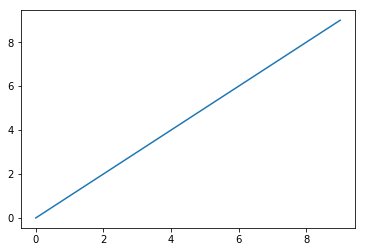

In [321]:
# Plotting with objects
fig = plt.figure()         # create new figure
ax = fig.add_subplot(111) # create new axes inside figure; 1 row, 1 column
ax.plot(np.arange(10))

In this example just one axes object exists in the canvas (figure), named `ax`. Now the following lines of code to create the same plot using the state machine interface (pyplot):

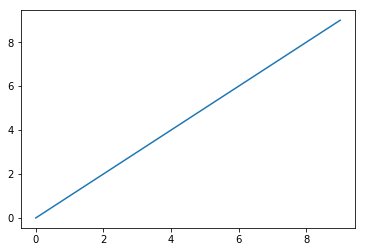

In [307]:
# Plotting interactively
plt.plot(np.arange(10))

Awesome, we only need 1 line of code, instead of three. For now, we recommend that you use this interactive interface, because its simpler to use. Using `pyplot` means that all plotting command starts with `plt.xx`. Just remember that this way of plotting is less flexible, because the axes are not named and cannot be re-used or modified by functions. To learn more about the anatomy of a figure, and the different styles of plotting, see the [Matplotlib FAQ](matplotlib.org/faq/usage_faq.html).

**Exercise 3.8 (lineplots)** Lineplots or $xy$−plots are the most simple kind of plot. First, the domain $[0,2\pi]$ is "discretized" or divided into segments. We’ll start off with a rather coarse discretization:
$$x = [0, 0.5, 1, 1.5, 2] \pi$$
1. Create an ndarray named x containing these values.
2. Calculate $y_1 = sin(x)$ and plot the result using `plt.plot(x,y1,’-s’)`. Explain whether you are happy with the discretization.

    The squares in the figure you just produced are called _vertices_. Mathematically speaking, the vertices are a discrete set ${x_0,x_1,...,x_N}$ at which the function $y$ is evaluated. The `s` in the plotting command stands for ’square’ which is the marker type drawn at every vertex. The `-` stands for ’solid line’ which connects the vertices using straight line segments.  
    
3. Increasing the resolution of x (the spacing of vertices) can be done by hand, which is cumbersome and prone to errors. Instead, use a list comprehension to generate the vertices, ideally converting them into an ndarray afterwards. Alternatively, use `np.linspace()`. Discretize the same domain, but now with 10 vertices (`np.size(x) = 10`) and remake the sine-plot. Verify that there are 9 segments in the graph. Why 9?
4. Remake the plot with 100 vertices. Drop the ’s’ in the plot command to get rid of the markers. How many line segments are there now?
5. In the same plot, draw $y_2 = cos(x)$. Then make the following additions:
    * put axis labels
    * change line thicknesses to 2.0
    * add function descriptions as text annotations, each in their respective color
    * change the ticks on the x-axis such that it has ticklabels $0$, $\pi$, and $2\pi$, at the correct positions   
    
  Using this [J.R. Johanssons notebook](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) as a reference  

***Answers.***

In [105]:
# 1.
x = np.asarray([0,0.5,1,1.5,2]) * np.pi

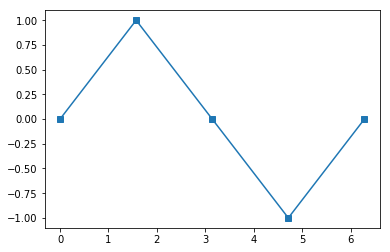

In [109]:
# 2. 
y1 = np.sin(x)
plt.plot(x,y1,"-s") # this discretization is very coarse

In [132]:
# 3. 
N = 10 # number of vertices
dx = 2 / (N-1) # number of segments
vert = [i*dx for i in range(N) ] # list comprehension to generate vertices
x = np.asarray(vert) * np.pi
np.size(x)

10

In [135]:
x = np.linspace(0, 2*np.pi, 10) # linspace
np.size(x)

10

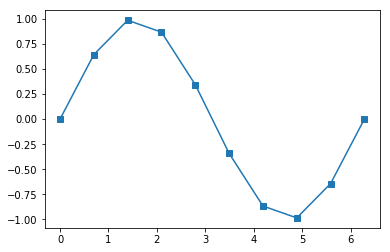

In [136]:
plt.plot(x,np.sin(x),"-s")  # there is one less segment than the number of vertices

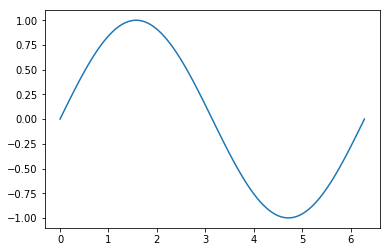

In [139]:
# 4. 
x = np.linspace(0, 2*np.pi, 100) # linspace
plt.plot(x,np.sin(x),"-") # there are 99 line segments

Text(0.2,-0.8,'$y=\\cos(x)$')

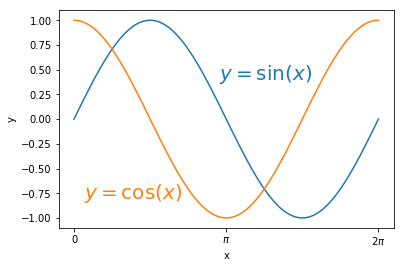

In [158]:
# 5.
plt.plot(x,np.sin(x),"-")
plt.plot(x,np.cos(x),"-")
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([0, np.pi, 2*np.pi],['0','$\pi$','$2\pi$'])

# default colors used for plotting (or use your own)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

plt.text(3, 0.4, r"$y=\sin(x)$", fontsize=20, color=colors[0])
plt.text(0.2, -0.8, r"$y=\cos(x)$", fontsize=20, color=colors[1])

## Subplots

More elaborate plots usually requires you to switch to the object interface. For example, when you want to create multiple axes in one figure.

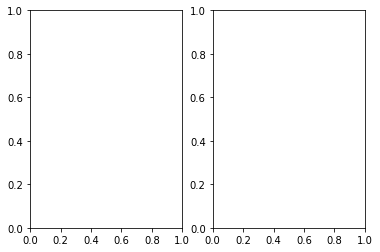

In [331]:
fig = plt.figure()         # create new figure
ax1 = fig.add_subplot(121) # create new axes inside figure; 1 row, 2 columns
ax2 = fig.add_subplot(122) # create new axes inside figure; 1 row, 2 columns

# Part 4 - miscellaneous 

## Modules

External modules or libraries are imported with the `import` statement

In [314]:
import numpy

This will import the library functions as `numpy.sin`, `numpy.cos`, ... To save space, it is the convention to rename the library to `np` using the `as` keyword

In [315]:
import numpy as np

One could even save more space by importing the library contents without any prefix (`sin`, `cos`, ...) using the wildcard operator (`*`) yet this is **highly discouraged** because A) it obfuscates the origin of functions and B) will likely lead to _variable name clashes_.

In [316]:
from numpy import * # not recommended

Sometimes you don't need the full library but just one or two functions. In that case you could use `from` in combination with the specific function names.

In [320]:
from numpy import sqrt # this is OK, since it allows insight into the origin of sqrt()